In [175]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy as sis
import pandas as pd

### **4.1** Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente. (10%)

In [176]:
def senosoidal_min(Fo):
    Fo=Fo
    Fs=160*2
    Ts=1/Fs
    t=np.arange(0,1,Ts)
    w=2*np.pi*Fo
    x=np.sin(w*t)
    return t,x
def senosoidal_op(Fo):
    Fo=Fo
    Fs=1000
    Ts=1/Fs
    t=np.arange(0,1,Ts)
    w=2*np.pi*Fo
    x=np.sin(w*t)
    return t,x

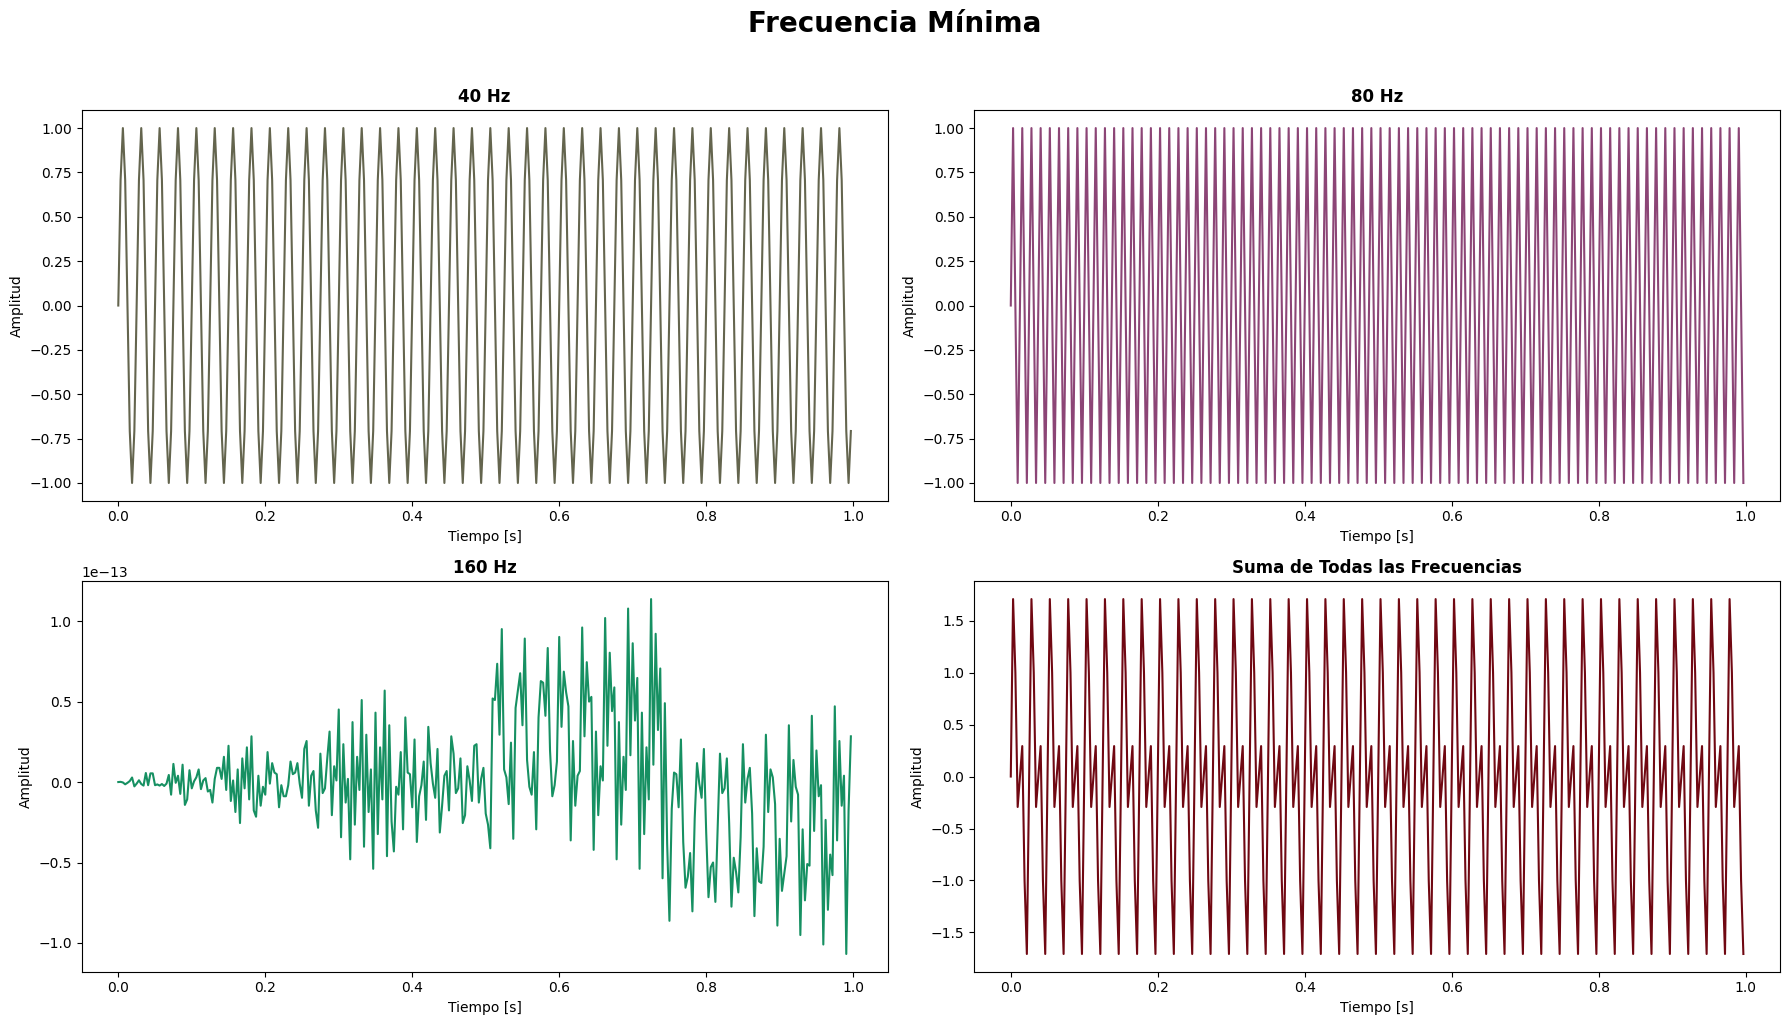

In [177]:
at,ax = senosoidal_min(40)
bt,bx = senosoidal_min(80)
ct,cx = senosoidal_min(160)
graficas = [ax,bx,cx,(ax+bx+cx)]
tiempo = [at,bt,ct,ct]
labels = ['40 Hz','80 Hz','160 Hz','Suma de Todas las Frecuencias']
fig,axs = plt.subplots(2,2,figsize=(18,10))
axs_flat = axs.flatten()
for i in range(4):
    col=np.random.uniform(0,0.7,size=3)
    axs_flat[i].plot(tiempo[i],graficas[i],color=col)
    axs_flat[i].set_title(labels[i],weight='bold')
    axs_flat[i].set_xlabel('Tiempo [s]')
    axs_flat[i].set_ylabel('Amplitud')
fig.suptitle('Frecuencia Mínima',fontsize=20,weight='bold',y=1.02)
plt.tight_layout()
plt.show()

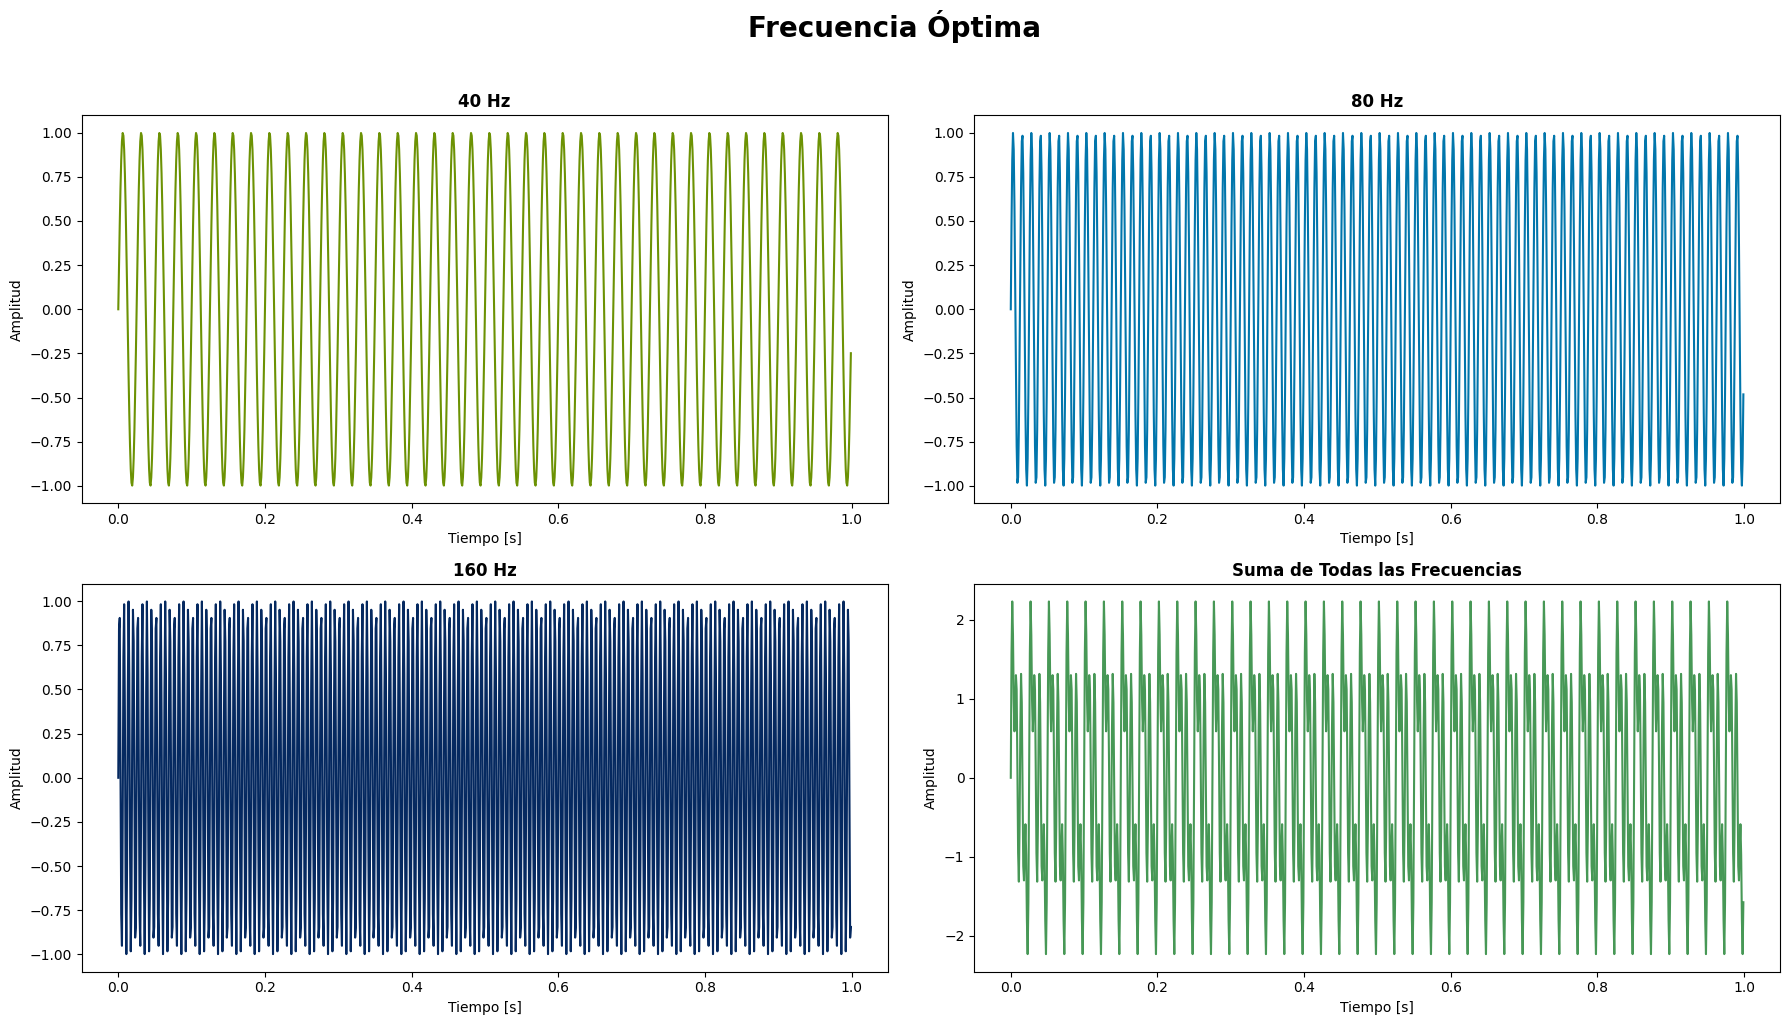

In [178]:
at,ax = senosoidal_op(40)
bt,bx = senosoidal_op(80)
ct,cx = senosoidal_op(160)
graficas = [ax,bx,cx,(ax+bx+cx)]
tiempo = [at,bt,ct,ct]
labels = ['40 Hz','80 Hz','160 Hz','Suma de Todas las Frecuencias']
fig,axs = plt.subplots(2,2,figsize=(18,10))
axs_flat = axs.flatten()
for i in range(4):
    col=np.random.uniform(0,0.7,size=3)
    axs_flat[i].plot(tiempo[i],graficas[i],color=col)
    axs_flat[i].set_title(labels[i],weight='bold')
    axs_flat[i].set_xlabel('Tiempo [s]')
    axs_flat[i].set_ylabel('Amplitud')
fig.suptitle('Frecuencia Óptima',fontsize=20,weight='bold',y=1.02)
plt.tight_layout()
plt.show()

In [179]:
Sumatoria = graficas[3]
def Fourier(señal): # Cálculo del espectro de frecuencia [1]
    FFT_S = np.fft.fft(Sumatoria)
    N = len(FFT_S)
    frequencies = np.fft.fftfreq(N,1/1000)[:N//2]
    magnitude = np.abs(FFT_S)[:N//2]
    # Graficación del espectro de frecuencia
    plt.figure(figsize=(18,5))
    plt.plot(frequencies,magnitude,color='r')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.title('Espectro de frecuencia',weight='bold',y=1.1,fontsize='20')
    plt.xlim([0,200])
    plt.xticks(np.arange(0,201,10))
    plt.grid(True)
    plt.show()
    return FFT_S

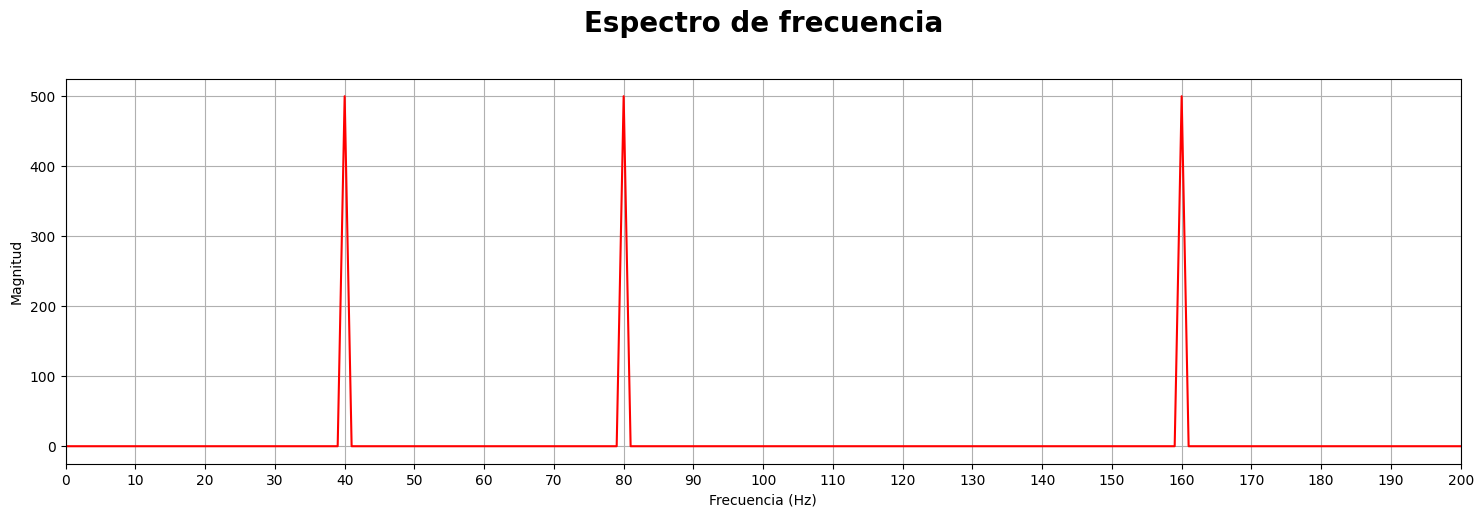

In [180]:
FFT_s=Fourier(Sumatoria)

In [181]:
def InvFourier(señal):   
    # Transformada inversa de Fourier
    FFT_S_inv = np.fft.ifft(señal)
    # Graficación de la señal obtenida
    plt.figure(figsize=(18,5))
    plt.plot(tiempo[2],np.real(FFT_S_inv))
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.title('Señal reconstruida mediante la transformada inversa de Fourier',weight='bold',fontsize='20',y=1.1)
    plt.grid(True)
    plt.show()
    return FFT_S_inv

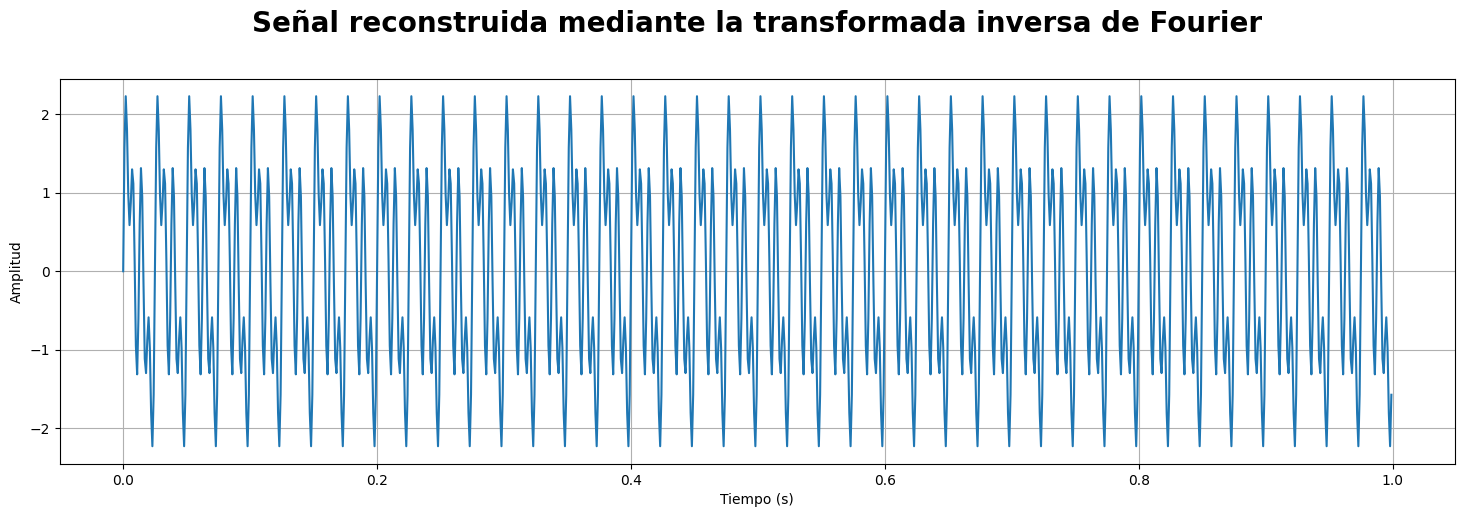

In [182]:
FFT_s=InvFourier(FFT_s)

In [183]:
data = sio.loadmat('senecg.mat')
ecg = data['ECG']
ecg = [item for sublist in ecg for item in sublist]

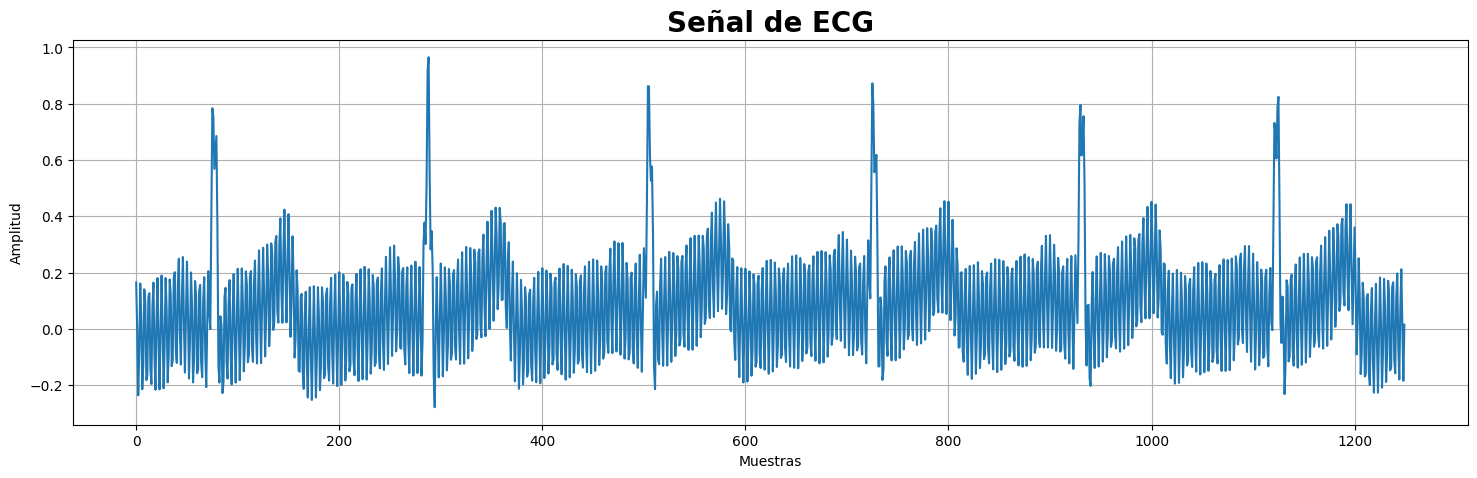

In [184]:
plt.figure(figsize=(18,5))
plt.plot(ecg)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Señal de ECG',weight='bold',fontsize=20)
plt.grid(True)
plt.show()

In [185]:
def Peridograma(señal,titulo):
    f,Pxx = sis.signal.welch(señal,fs=250,nperseg=1024)
    plt.figure(figsize=(18,5))
    plt.plot(f,Pxx)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Potencia')
    plt.title(f'{titulo}',weight='bold',fontsize=20,y=1.1)
    plt.grid(True)
    plt.show()
    return f,Pxx

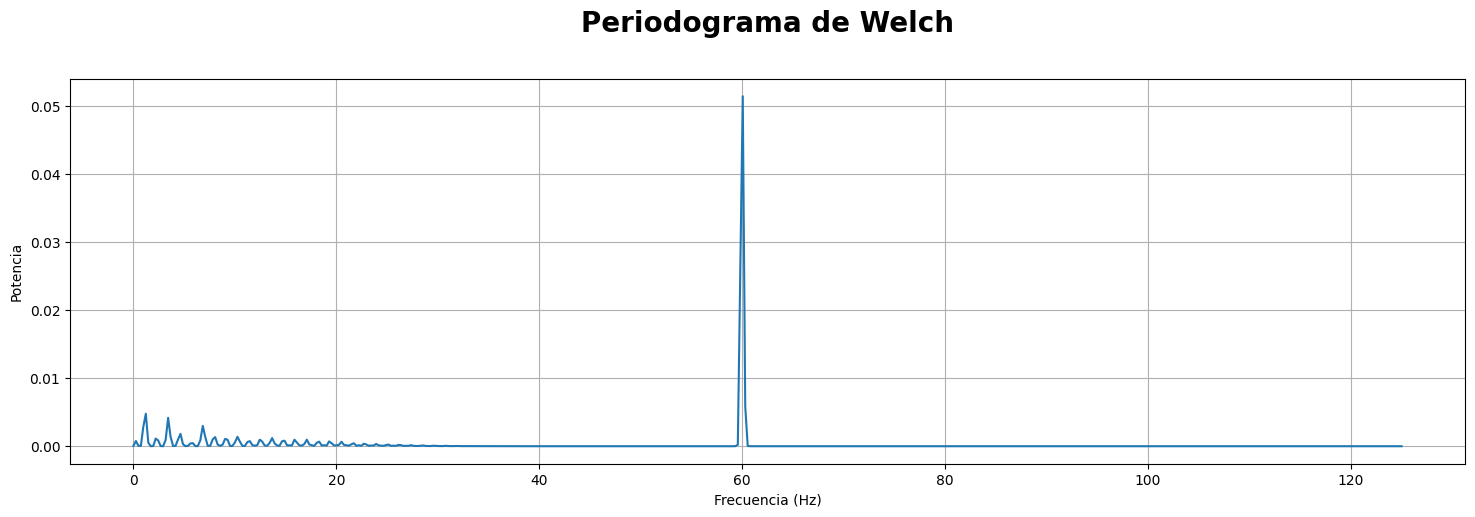

In [186]:
f,Pxx=Peridograma(ecg,'Periodograma de Welch')

In [187]:
def senal_continua(matriz,sensores,puntos,epocas):
    s_c=np.reshape(matriz,(sensores,puntos*epocas),order='F')
    return s_c

In [188]:
datos_control=sio.loadmat('Control_31.mat')
control=datos_control['data']
senal_control=senal_continua(control,control.shape[0],control.shape[1],control.shape[2])
datos_park=sio.loadmat('Parkinson_25.mat')
park=datos_park['data']
senal_park=senal_continua(park,park.shape[0],park.shape[1],park.shape[2])

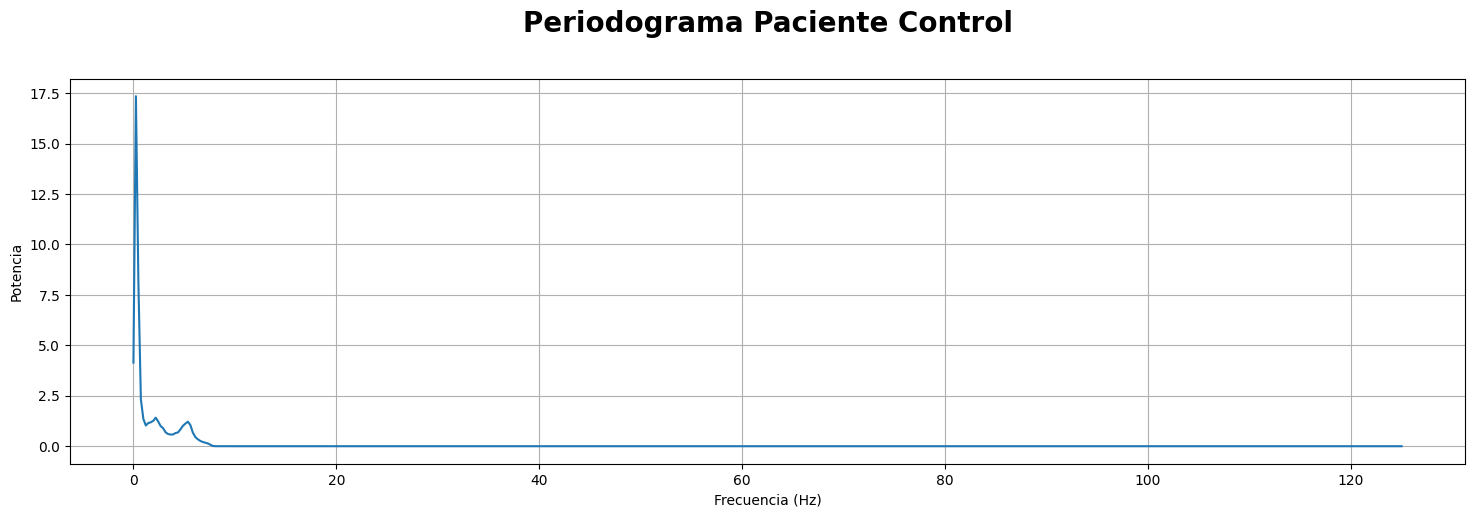

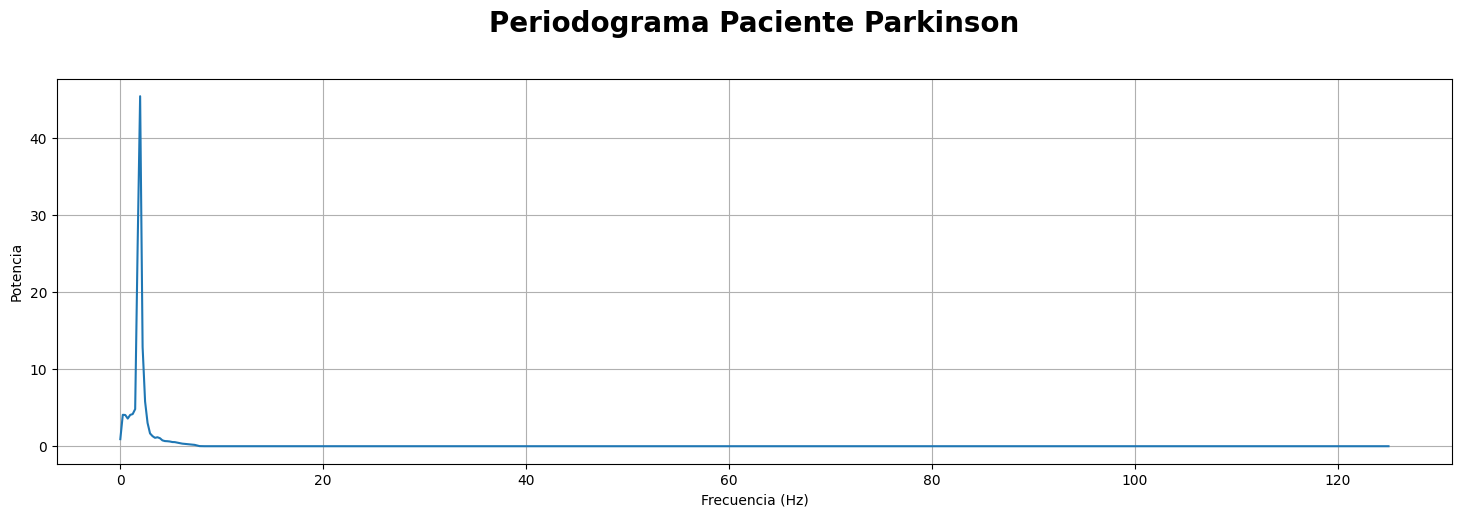

In [189]:
f,Pxx=Peridograma(senal_control[1],'Periodograma Paciente Control')
f,Pxx=Peridograma(senal_park[1],'Periodograma Paciente Parkinson')

## **¿Por qué se utilizó la Ventana de Hanning?**
### La resolución frecuencial del periodograma está determinada por la longitud de la ventana de análisis. Una ventana más larga proporciona una mejor resolución frecuencial. Debido a esto optamos por un valor de 1024 puntos y una frecuencia de muestreo de 250 Hz, los cuales se han establecido como valores de referencia dentro la función implementada.
## Conclusiones
### La aletoriedad en la escogencia del paciente de control y el paciente con Parkinson permite analizar la potencia en la señal registrada. Como se puede observar, mientras se tiene un pico máximo de aproximadamente 17.5 para el paciente de control, el paciente con la enfermedad eleva su pico de potencia a más de 40, lo cual indica mayor actividad muscular en este caso, infiriendo movimientos más bruscos.
## **Referencias**
### [1] numpy.fft.ifft — NumPy v1.26 Manual. (s.f.). NumPy [En línea] -. https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html